In [464]:
# Import the required modules
import pandas as pd
from pathlib import Path
from sklearn.datasets import make_blobs
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
from imblearn.over_sampling import RandomOverSampler
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.calibration import calibration_curve
from sklearn.calibration import CalibratedClassifierCV
from sklearn.metrics import classification_report, balanced_accuracy_score, confusion_matrix, f1_score, accuracy_score
from scipy.stats import zscore
import seaborn as sns
import matplotlib.pyplot as plt

##### Data Manipulation 

In [465]:
# Read the usage_stats.csv file from the Resources folder into a Pandas DataFrame
GeneticDisorder_df = pd.read_csv(
    Path(r"Resources\train.csv")
)

# Review the DataFrame
display(GeneticDisorder_df.head())
display(GeneticDisorder_df.tail())

,Patient Id,Patient Age,Genes in mother's side,Inherited from father,Maternal gene,Paternal gene,Blood cell count (mcL),Patient First Name,Family Name,Father's name,...,Birth defects,White Blood cell count (thousand per microliter),Blood test result,Symptom 1,Symptom 2,Symptom 3,Symptom 4,Symptom 5,Genetic Disorder,Disorder Subclass
0,PID0x6418,2.0,Yes,No,Yes,No,4.760603,Richard,NaN,Larre,...,NaN,9.857562,NaN,1.0,1.0,1.0,1.0,1.0,Mitochondrial genetic inheritance disorders,Leber's hereditary optic neuropathy
1,PID0x25d5,4.0,Yes,Yes,No,No,4.910669,Mike,NaN,Brycen,...,Multiple,5.522560,normal,1.0,NaN,1.0,1.0,0.0,NaN,Cystic fibrosis
2,PID0x4a82,6.0,Yes,No,No,No,4.893297,Kimberly,NaN,Nashon,...,Singular,NaN,normal,0.0,1.0,1.0,1.0,1.0,Multifactorial genetic inheritance disorders,Diabetes
3,PID0x4ac8,12.0,Yes,No,Yes,No,4.705280,Jeffery,Hoelscher,Aayaan,...,Singular,7.919321,inconclusive,0.0,0.0,1.0,0.0,0.0,Mitochondrial genetic inheritance disorders,Leigh syndrome
4,PID0x1bf7,11.0,Yes,No,NaN,Yes,4.720703,Johanna,Stutzman,Suave,...,Multiple,4.098210,NaN,0.0,0.0,0.0,0.0,NaN,Multifactorial genetic inheritance disorders,Cancer


,Patient Id,Patient Age,Genes in mother's side,Inherited from father,Maternal gene,Paternal gene,Blood cell count (mcL),Patient First Name,Family Name,Father's name,...,Birth defects,White Blood cell count (thousand per microliter),Blood test result,Symptom 1,Symptom 2,Symptom 3,Symptom 4,Symptom 5,Genetic Disorder,Disorder Subclass
22078,PID0x5598,4.0,Yes,Yes,Yes,No,5.258298,Lynn,NaN,Alhassane,...,Multiple,6.584811,inconclusive,0.0,0.0,1.0,0.0,0.0,Mitochondrial genetic inheritance disorders,Leigh syndrome
22079,PID0x19cb,8.0,No,Yes,No,Yes,4.974220,Matthew,Farley,Dartanion,...,Multiple,7.041556,inconclusive,1.0,1.0,1.0,1.0,0.0,Multifactorial genetic inheritance disorders,Diabetes
22080,PID0x3c4f,8.0,Yes,No,Yes,No,5.186470,John,NaN,Cavani,...,Singular,7.715464,normal,0.0,0.0,0.0,1.0,NaN,Mitochondrial genetic inheritance disorders,Mitochondrial myopathy
22081,PID0x13a,7.0,Yes,No,Yes,Yes,4.858543,Sharon,NaN,Bomer,...,Multiple,8.437670,abnormal,1.0,1.0,1.0,0.0,0.0,NaN,Leigh syndrome
22082,PID0x9332,11.0,Yes,No,No,No,4.738067,Andrew,Mose,Eban,...,Singular,11.188371,normal,1.0,0.0,1.0,1.0,1.0,Multifactorial genetic inheritance disorders,Diabetes


In [466]:
# Get column names and data
GeneticDisorder_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22083 entries, 0 to 22082
Data columns (total 45 columns):
 #   Column                                            Non-Null Count  Dtype  
---  ------                                            --------------  -----  
 0   Patient Id                                        22083 non-null  object 
 1   Patient Age                                       20656 non-null  float64
 2   Genes in mother's side                            22083 non-null  object 
 3   Inherited from father                             21777 non-null  object 
 4   Maternal gene                                     19273 non-null  object 
 5   Paternal gene                                     22083 non-null  object 
 6   Blood cell count (mcL)                            22083 non-null  float64
 7   Patient First Name                                22083 non-null  object 
 8   Family Name                                       12392 non-null  object 
 9   Father's name    

In [467]:
# Drop unnecessary columns from the training dataset
columns_to_remove = ['Patient Id', 'Patient First Name', 'Family Name', 'Father\'s name', 'Mother\'s age', 'Father\'s age', 'Institute Name', 'Location of Institute', 'Place of birth','Test 1','Test 2','Test 3','Test 4', 'Test 5', 'Symptom 1', 'Symptom 2', 'Symptom 3', 'Symptom 4', 'Symptom 5', 'Parental consent', 'Disorder Subclass']
columns_to_remove_train = [col for col in columns_to_remove if col in GeneticDisorder_df.columns]
GeneticDisorder_cleaned_df = GeneticDisorder_df.drop(columns=columns_to_remove_train)

In [468]:
# Count the number of NaN values in each column
nan_counts = GeneticDisorder_cleaned_df.isna().sum()

# Display the results
print("Number of NaN values in each column:")
print(nan_counts)

Number of NaN values in each column:
Patient Age                                         1427
Genes in mother's side                                 0
Inherited from father                                306
Maternal gene                                       2810
Paternal gene                                          0
Blood cell count (mcL)                                 0
Status                                                 0
Respiratory Rate (breaths/min)                      2149
Heart Rate (rates/min                               2113
Follow-up                                           2166
Gender                                              2173
Birth asphyxia                                      2139
Autopsy shows birth defect (if applicable)          4392
Folic acid details (peri-conceptional)              2117
H/O serious maternal illness                        2152
H/O radiation exposure (x-ray)                      2153
H/O substance abuse                                

In [469]:
# Drop rows with missing values
GeneticDisorder_dropped_df = GeneticDisorder_cleaned_df.dropna()

In [470]:
# Identify non-numeric columns
# non_numeric_columns = GeneticDisorder_cleaned_df.select_dtypes(exclude=['float64', 'int64', 'bool']).columns

# Display unique values in non-numeric columns
# for column in non_numeric_columns:
#    print(f"Unique values in {column}: {GeneticDisorder_cleaned_df[column].unique()}")


In [471]:
# Replace NaN values with the median for numerical columns
# numerical_cols = GeneticDisorder_cleaned_df.select_dtypes(include='number').columns
# GeneticDisorder_cleaned_df[numerical_cols] = GeneticDisorder_cleaned_df[numerical_cols].apply(lambda x: x.fillna(x.median()))

# Replace NaN values with the most frequent entry for categorical columns
# categorical_cols = GeneticDisorder_cleaned_df.select_dtypes(exclude='number').columns
# GeneticDisorder_cleaned_df[categorical_cols] = GeneticDisorder_cleaned_df[categorical_cols].apply(lambda x: x.fillna(x.mode().iloc[0]))


In [472]:
# Confirm no NaN values are reflected
nan_counts_after_drop = GeneticDisorder_dropped_df.isna().sum()
print("\nNumber of NaN values in each column after dropping rows:")
print(nan_counts_after_drop)


Number of NaN values in each column after dropping rows:
Patient Age                                         0
Genes in mother's side                              0
Inherited from father                               0
Maternal gene                                       0
Paternal gene                                       0
Blood cell count (mcL)                              0
Status                                              0
Respiratory Rate (breaths/min)                      0
Heart Rate (rates/min                               0
Follow-up                                           0
Gender                                              0
Birth asphyxia                                      0
Autopsy shows birth defect (if applicable)          0
Folic acid details (peri-conceptional)              0
H/O serious maternal illness                        0
H/O radiation exposure (x-ray)                      0
H/O substance abuse                                 0
Assisted conception IVF/

In [473]:
# Confirm that are no duplicate rows
duplicate_count = GeneticDisorder_dropped_df.duplicated().sum()

print("Count of duplicate rows:", duplicate_count)

# X_train_no_duplicates = GeneticDisorder_dropped_df.drop_duplicates()

Count of duplicate rows: 0


In [474]:
# Replace '-' with 'Not applicable' in the entire DataFrame
GeneticDisorder_dropped_df = GeneticDisorder_dropped_df.copy()
GeneticDisorder_dropped_df.replace('-', 'Not applicable', inplace=True)


In [475]:
# Replace 'Not applicable' with 'No' in the entire DataFrame
# GeneticDisorder_dropped_df = GeneticDisorder_dropped_df.copy()
# GeneticDisorder_dropped_df.replace('Not applicable', 'No', inplace=True)

In [476]:
# Select only numeric columns
numeric_columns = GeneticDisorder_dropped_df.select_dtypes(include='number')

# Calculate IQR for each numeric feature
Q1 = numeric_columns.quantile(0.25)
Q3 = numeric_columns.quantile(0.75)
IQR = Q3 - Q1

# Display the calculated IQR for each feature
print("Interquartile Range (IQR) for each feature:")
print(IQR)



Interquartile Range (IQR) for each feature:
Patient Age                                         8.000000
Blood cell count (mcL)                              0.267419
No. of previous abortion                            2.000000
White Blood cell count (thousand per microliter)    4.110672
dtype: float64


In [477]:
display(GeneticDisorder_dropped_df.head())
display(GeneticDisorder_dropped_df.tail())

,Patient Age,Genes in mother's side,Inherited from father,Maternal gene,Paternal gene,Blood cell count (mcL),Status,Respiratory Rate (breaths/min),Heart Rate (rates/min,Follow-up,...,H/O serious maternal illness,H/O radiation exposure (x-ray),H/O substance abuse,Assisted conception IVF/ART,History of anomalies in previous pregnancies,No. of previous abortion,Birth defects,White Blood cell count (thousand per microliter),Blood test result,Genetic Disorder
8,11.0,No,No,Yes,No,5.209058,Alive,Tachypnea,Tachycardia,Low,...,Yes,No,No,No,Yes,0.0,Multiple,6.669552,slightly abnormal,Mitochondrial genetic inheritance disorders
9,4.0,No,Yes,Yes,Yes,4.752272,Alive,Tachypnea,Tachycardia,Low,...,No,No,No,Yes,Yes,1.0,Multiple,6.397702,abnormal,Multifactorial genetic inheritance disorders
14,6.0,Yes,No,Yes,No,4.620420,Alive,Tachypnea,Tachycardia,High,...,Yes,Yes,Not applicable,No,No,3.0,Multiple,3.000000,slightly abnormal,Mitochondrial genetic inheritance disorders
18,10.0,Yes,Yes,Yes,No,4.751452,Deceased,Normal (30-60),Tachycardia,Low,...,No,Yes,No,Yes,Yes,3.0,Singular,9.382407,abnormal,Mitochondrial genetic inheritance disorders
19,6.0,No,Yes,Yes,Yes,4.876896,Deceased,Tachypnea,Normal,Low,...,Yes,No,No,Yes,No,1.0,Singular,7.370477,normal,Single-gene inheritance diseases


,Patient Age,Genes in mother's side,Inherited from father,Maternal gene,Paternal gene,Blood cell count (mcL),Status,Respiratory Rate (breaths/min),Heart Rate (rates/min,Follow-up,...,H/O serious maternal illness,H/O radiation exposure (x-ray),H/O substance abuse,Assisted conception IVF/ART,History of anomalies in previous pregnancies,No. of previous abortion,Birth defects,White Blood cell count (thousand per microliter),Blood test result,Genetic Disorder
22057,6.0,No,Yes,No,Yes,5.117296,Alive,Tachypnea,Tachycardia,High,...,No,No,Not applicable,No,Yes,3.0,Singular,3.453291,slightly abnormal,Mitochondrial genetic inheritance disorders
22066,13.0,No,Yes,No,Yes,4.777036,Alive,Normal (30-60),Normal,High,...,Yes,No,Not applicable,No,Yes,1.0,Singular,3.000736,normal,Mitochondrial genetic inheritance disorders
22068,4.0,Yes,No,No,No,5.077554,Deceased,Normal (30-60),Normal,Low,...,Yes,No,Not applicable,No,No,1.0,Singular,9.566549,inconclusive,Multifactorial genetic inheritance disorders
22076,0.0,Yes,No,Yes,No,4.931758,Alive,Normal (30-60),Tachycardia,Low,...,No,Not applicable,No,Yes,Yes,1.0,Singular,11.649052,abnormal,Mitochondrial genetic inheritance disorders
22079,8.0,No,Yes,No,Yes,4.974220,Alive,Normal (30-60),Normal,High,...,Yes,No,Not applicable,Yes,No,2.0,Multiple,7.041556,inconclusive,Multifactorial genetic inheritance disorders


In [478]:
# Export cleaned CSV data
# GeneticDisorder_dropped_df.to_csv('Resources/genetic_disorder.csv', index=False)

###### perform one-hot encoding

In [479]:
# Split the data into X (features) and y (target)
# The y variable should focus on the target column
y = GeneticDisorder_dropped_df['Genetic Disorder'].values

# The X variable should include all features except the target
X = GeneticDisorder_dropped_df.drop(columns=['Genetic Disorder'])

In [480]:
# Identify categorical columns and perform one-hot encoding only on features
categorical_columns = X.select_dtypes(include=['object']).columns
GeneticDisorder_encoded_df = pd.get_dummies(X, columns=categorical_columns, drop_first=True)

In [481]:
GeneticDisorder_encoded_df

,Patient Age,Blood cell count (mcL),No. of previous abortion,White Blood cell count (thousand per microliter),Genes in mother's side_Yes,Inherited from father_Yes,Maternal gene_Yes,Paternal gene_Yes,Status_Deceased,Respiratory Rate (breaths/min)_Tachypnea,...,H/O radiation exposure (x-ray)_Not applicable,H/O radiation exposure (x-ray)_Yes,H/O substance abuse_Not applicable,H/O substance abuse_Yes,Assisted conception IVF/ART_Yes,History of anomalies in previous pregnancies_Yes,Birth defects_Singular,Blood test result_inconclusive,Blood test result_normal,Blood test result_slightly abnormal
8,11.0,5.209058,0.0,6.669552,False,False,True,False,False,True,...,False,False,False,False,False,True,False,False,False,True
9,4.0,4.752272,1.0,6.397702,False,True,True,True,False,True,...,False,False,False,False,True,True,False,False,False,False
14,6.0,4.620420,3.0,3.000000,True,False,True,False,False,True,...,False,True,True,False,False,False,False,False,False,True
18,10.0,4.751452,3.0,9.382407,True,True,True,False,True,False,...,False,True,False,False,True,True,True,False,False,False
19,6.0,4.876896,1.0,7.370477,False,True,True,True,True,True,...,False,False,False,False,True,False,True,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
22057,6.0,5.117296,3.0,3.453291,False,True,False,True,False,True,...,False,False,True,False,False,True,True,False,False,True
22066,13.0,4.777036,1.0,3.000736,False,True,False,True,False,False,...,False,False,True,False,False,True,True,False,True,False
22068,4.0,5.077554,1.0,9.566549,True,False,False,False,True,False,...,False,False,True,False,False,False,True,True,False,False
22076,0.0,4.931758,1.0,11.649052,True,False,True,False,False,False,...,True,False,False,False,True,True,True,False,False,False


In [482]:
# Get column names and data
GeneticDisorder_encoded_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 6416 entries, 8 to 22079
Data columns (total 31 columns):
 #   Column                                                     Non-Null Count  Dtype  
---  ------                                                     --------------  -----  
 0   Patient Age                                                6416 non-null   float64
 1   Blood cell count (mcL)                                     6416 non-null   float64
 2   No. of previous abortion                                   6416 non-null   float64
 3   White Blood cell count (thousand per microliter)           6416 non-null   float64
 4   Genes in mother's side_Yes                                 6416 non-null   bool   
 5   Inherited from father_Yes                                  6416 non-null   bool   
 6   Maternal gene_Yes                                          6416 non-null   bool   
 7   Paternal gene_Yes                                          6416 non-null   bool   
 8   Status_Decea

###### Split the data into training and testing datasets by using `train_test_split`

In [483]:
print("Shape of X:", GeneticDisorder_encoded_df.shape)
print("Shape of y:", len(y))


Shape of X: (6416, 31)
Shape of y: 6416


In [484]:
# Split the data into training and testing sets after scaling
X_train, X_test, y_train, y_test = train_test_split(GeneticDisorder_encoded_df, 
                                                    y, 
                                                    random_state=1, 
                                                    stratify=y)


In [485]:
# Scale the data using StandardScaler
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [486]:
# Declare a logistic regression model.
# Apply a random_state of 9 to the model
lr_model = LogisticRegression(random_state=9, class_weight='balanced')

# Fit and save the logistic regression model using the data
lr_model = lr_model.fit(X_train_scaled, y_train)

In [487]:
# Evaluate the model
train_score = lr_model.score(X_train_scaled, y_train)
test_score = lr_model.score(X_test_scaled, y_test)

print(f"Training Data Score: {train_score}")
print(f"Testing Data Score: {test_score}")

Training Data Score: 0.36554447215295094
Testing Data Score: 0.32917705735660846


In [488]:
#Generate training predictions
GDtraining_predictions = lr_model.predict(X_train)

#Generate testing predictions
GDtesting_predictions = lr_model.predict(X_test)

c:\Users\starl\anaconda3\lib\site-packages\sklearn\base.py:458: UserWarning: X has feature names, but LogisticRegression was fitted without feature names
  warnings.warn(
c:\Users\starl\anaconda3\lib\site-packages\sklearn\base.py:458: UserWarning: X has feature names, but LogisticRegression was fitted without feature names
  warnings.warn(


In [489]:
# Create and save the confusion matrix for the training data
GDtraining_matrix = confusion_matrix(y_train, GDtraining_predictions)

# Print the confusion matrix for the training data
print("Confusion Matrix for Logistic Regression model:")
print(GDtraining_matrix)

Confusion Matrix for Logistic Regression model:
[[   0  219 2251]
 [   0   74  414]
 [   0  136 1718]]


In [490]:
# Create and save the confusion matrix for the testing data
GDtesting_matrix = confusion_matrix(y_test, GDtesting_predictions)

# Print the confusion matrix for the testing data
print("Confusion Matrix for Logistic Regression model:")
print(GDtesting_matrix)

Confusion Matrix for Logistic Regression model:
[[  0  73 750]
 [  0  27 136]
 [  0  53 565]]


In [491]:
# Create and save the training classification report
GDtraining_report = classification_report(y_train, GDtraining_predictions)

# Print the training classification report
print("Classification Report for Logistic Regression model:")
print(GDtraining_report)

Classification Report for Logistic Regression model:
                                              precision    recall  f1-score   support

 Mitochondrial genetic inheritance disorders       0.00      0.00      0.00      2470
Multifactorial genetic inheritance disorders       0.17      0.15      0.16       488
            Single-gene inheritance diseases       0.39      0.93      0.55      1854

                                    accuracy                           0.37      4812
                                   macro avg       0.19      0.36      0.24      4812
                                weighted avg       0.17      0.37      0.23      4812



c:\Users\starl\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\starl\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\starl\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [492]:
# Create and save the testing classification report
GDtesting_report = classification_report(y_test, GDtesting_predictions)

# Print the testing classification report
print("Classification Report for Logistic Regression model:")
print(GDtesting_report)

Classification Report for Logistic Regression model:
                                              precision    recall  f1-score   support

 Mitochondrial genetic inheritance disorders       0.00      0.00      0.00       823
Multifactorial genetic inheritance disorders       0.18      0.17      0.17       163
            Single-gene inheritance diseases       0.39      0.91      0.55       618

                                    accuracy                           0.37      1604
                                   macro avg       0.19      0.36      0.24      1604
                                weighted avg       0.17      0.37      0.23      1604



c:\Users\starl\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\starl\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\starl\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [493]:
# Print the balanced_accuracy score of the model
print(f"The balanced_accuracy score of the model: {balanced_accuracy_score(y_test, GDtesting_predictions)}")

The balanced_accuracy score of the model: 0.35996121799326275


Create a Logistics Regression Model with Predictions Using Genetic Disorder

In [494]:
classifier = LogisticRegression(solver='lbfgs', random_state=1)
classifier

LogisticRegression(random_state=1)

In [495]:
# Train the data
classifier.fit(X_train_scaled, y_train)

LogisticRegression(random_state=1)

In [496]:
# Score the model
print(f"Training Data Score: {classifier.score(X_train_scaled, y_train)}")
print(f"Testing Data Score: {classifier.score(X_test_scaled, y_test)}")

Training Data Score: 0.5160016625103907
Testing Data Score: 0.516209476309227


In [497]:
# Predict outcomes for test data set
predictions = classifier.predict(X_test_scaled)
pd.DataFrame({"Prediction": predictions, "Actual": y_test})

,Prediction,Actual
0,Mitochondrial genetic inheritance disorders,Single-gene inheritance diseases
1,Mitochondrial genetic inheritance disorders,Mitochondrial genetic inheritance disorders
2,Mitochondrial genetic inheritance disorders,Mitochondrial genetic inheritance disorders
3,Mitochondrial genetic inheritance disorders,Single-gene inheritance diseases
4,Mitochondrial genetic inheritance disorders,Mitochondrial genetic inheritance disorders
...,...,...
1599,Mitochondrial genetic inheritance disorders,Mitochondrial genetic inheritance disorders
1600,Mitochondrial genetic inheritance disorders,Mitochondrial genetic inheritance disorders
1601,Mitochondrial genetic inheritance disorders,Single-gene inheritance diseases
1602,Mitochondrial genetic inheritance disorders,Mitochondrial genetic inheritance disorders


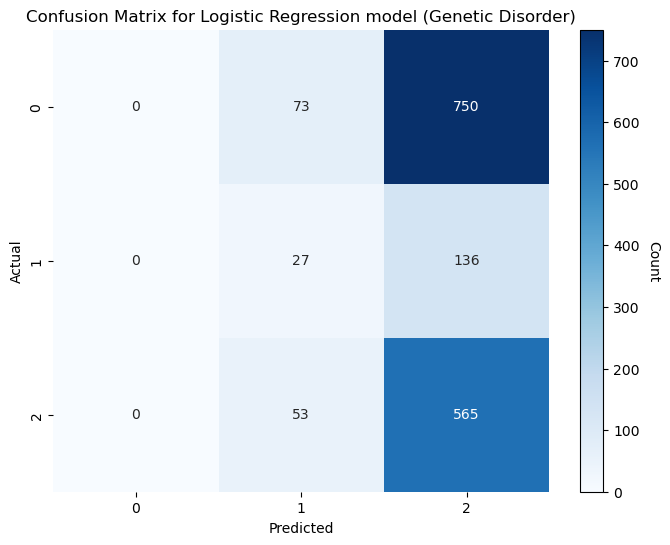

In [498]:
# Confusion Matrix Heatmap for Logistic Regression model
plt.figure(figsize=(8, 6))
heatmap = sns.heatmap(GDtesting_matrix, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.title('Confusion Matrix for Logistic Regression model (Genetic Disorder)')
plt.xlabel('Predicted')
plt.ylabel('Actual')

# Add legend
cbar = heatmap.figure.colorbar(heatmap.collections[0])
cbar.set_label('Count', rotation=270, labelpad=15)

plt.show()

# The confusion matrix heatmap allows users to visually assess how well the Logistic Regression model \
# is performing in predicting the "Genetic Disorder" by comparing the predicted and actual classes. The goal is \
# to have higher counts along the diagonal (from the top left to the bottom right), indicating correct predictions, and \
# lower counts in off-diagonal cells, indicating misclassifications. The color intensity provides a quick visual summary \
# of the distribution of predictions.

In [499]:
# Using the Logistic Regression model
coefficients = lr_model.coef_[0]

# Get the names of all features
all_feature_names = GeneticDisorder_encoded_df.columns

# Create a DataFrame to display feature names and their coefficients
feature_coefficients_df = pd.DataFrame({'Feature': all_feature_names[:len(coefficients)], 'Coefficient': coefficients})

# Display the DataFrame sorted by absolute coefficient values
feature_coefficients_df['Absolute Coefficient'] = feature_coefficients_df['Coefficient'].abs()
feature_coefficients_df = feature_coefficients_df.sort_values(by='Absolute Coefficient', ascending=False)

# Display the top features and their coefficients
print(feature_coefficients_df)


# Coefficients indicate the strength and direction (positive or negative) of the relationship between each feature and the predicted outcome. \
# A negative coefficient suggests an inverse relationship between the feature and the predicted outcome. The majority have a small negative coefficient, 
# which an increase in these values is associated with a decrease in the predicted outcome (lower likelihood of a Genetic Disorder).
# Magnitude (Absolute Coefficient) of the coefficient indicates the strength of the relationship. Larger absolute values indicate a stronger influence on the predicted outcome.


                                              Feature  Coefficient  \
4                          Genes in mother's side_Yes    -0.078772   
6                                   Maternal gene_Yes    -0.063188   
26   History of anomalies in previous pregnancies_Yes     0.058117   
21      H/O radiation exposure (x-ray)_Not applicable     0.053914   
5                           Inherited from father_Yes    -0.052941   
7                                   Paternal gene_Yes    -0.046975   
27                             Birth defects_Singular     0.025734   
30                Blood test result_slightly abnormal    -0.025338   
17  Autopsy shows birth defect (if applicable)_Not...     0.025254   
8                                     Status_Deceased    -0.025254   
9            Respiratory Rate (breaths/min)_Tachypnea    -0.023179   
12                                      Gender_Female     0.019672   
16                                 Birth asphyxia_Yes    -0.014887   
1                   

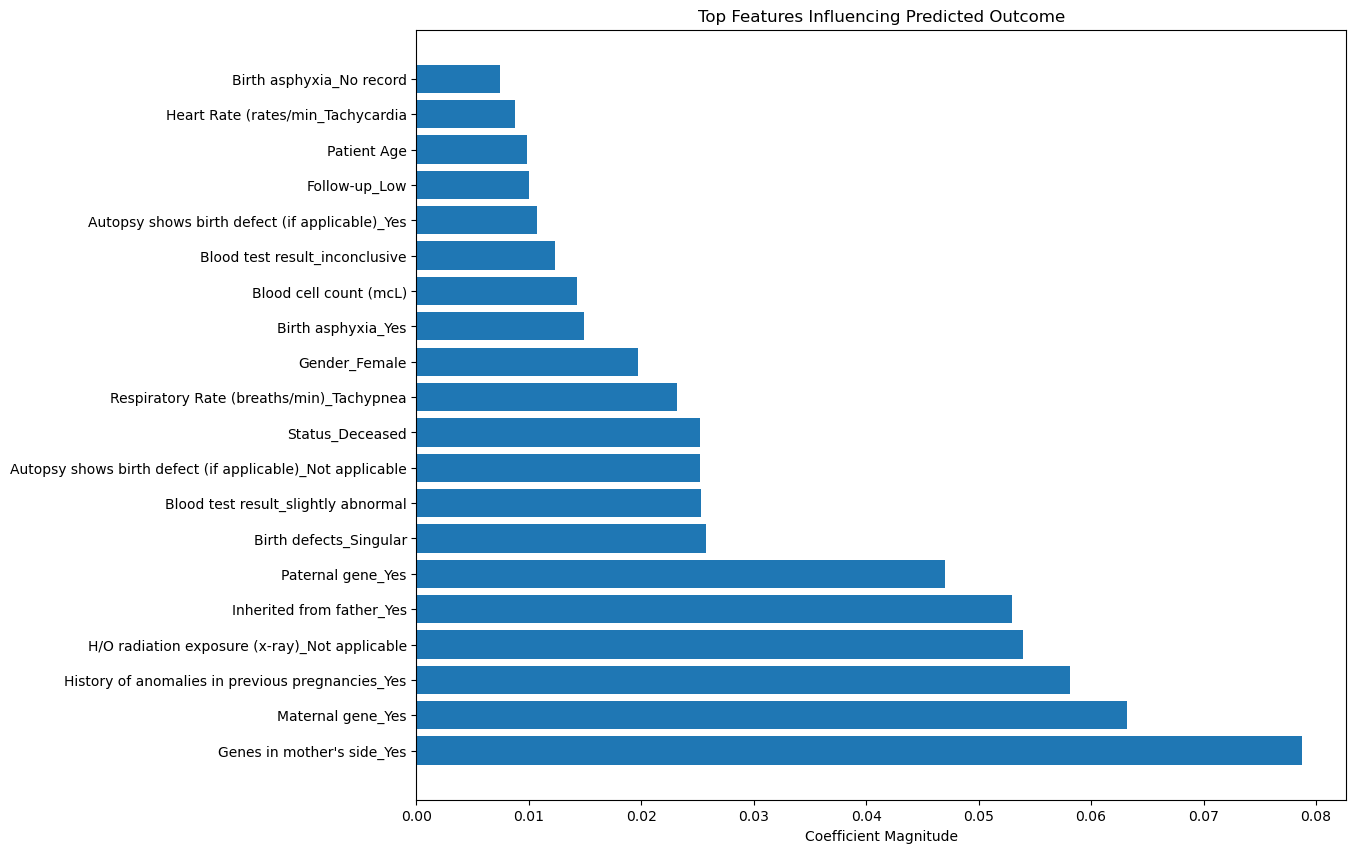

In [500]:
coefficients = lr_model.coef_[0]

# Get the absolute values of coefficients for feature importance
feature_importance = abs(coefficients)

# Get the names of all features
all_feature_names = GeneticDisorder_encoded_df.columns

# Get the indices of the top 20 features
top_20_indices = feature_importance.argsort()[-20:][::-1]

# Get the names and importance of the top 20 features
top_20_feature_names = all_feature_names[top_20_indices]
top_20_feature_importance = feature_importance[top_20_indices]

# Plot the top 20 features and their importance
plt.figure(figsize=(12, 10))
plt.barh(top_20_feature_names, top_20_feature_importance)
plt.xlabel('Coefficient Magnitude')
plt.title('Top Features Influencing Predicted Outcome')
plt.show()

# This graph helps users identify and prioritize the most influential features for the logistic regression model. \
# "Coefficient Magnitude" is a measure of how much a feature contributes to the model's predictions, considering both \
# the positive and negative impacts. Larger magnitudes indicate features that have a more substantial influence on the predicted outcome.